Question 1:

The Simple Linear Regression model is the equation we use to express this straight line through the data:
𝑌𝑖 = 𝛽0 + 𝛽1𝑥𝑖 + 𝜖𝑖
𝑌𝑖: The outcome we’re predicting for each individual data point i.
𝛽0: The intercept coefficient that tells us the expected value of y when x=0.
𝛽1: The slope coefficient that how much y is expected to increase when x increases by 1 unit.
𝑥𝑖: The predictor variable for each data point i.
𝜖𝑖: The error term that accounts for randomness that causes y to not fall exactly on the line for each x.

How they combine to form a sample from normal distribution:

Given a predictor value, the expected y-value for that 𝑥𝑖 based on the linear model is 𝛽0 + 𝛽1𝑥𝑖. Since there exists the error term 𝜖𝑖, the observed 𝑌𝑖 value is usually different from this line. This makes each observed 𝑌𝑖 a random variable with its own normal distribution centered around 𝛽0 + 𝛽1𝑥𝑖 with standard deviation 𝜎 , where 𝜖𝑖∼N(0,𝜎2) and 𝑌𝑖∼N(𝛽0+𝛽1𝑥𝑖,𝜎2).

In [10]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm

n = 50           
beta0 = 2.0        
beta1 = 1.5        
sigma = 1.0        

x = np.linspace(0, 10, n)

errors = norm.rvs(loc=0, scale=sigma, size=n)

y = beta0 + beta1 * x + errors

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Sampled Data Points'))

fig.add_trace(go.Scatter(x=x, y=beta0 + beta1 * x, mode='lines', name='True Model Line'))

fig.update_layout(
    title="Simple Linear Regression: Normally Distributed Samples around Theoretical Line",
    xaxis_title="Predictor (x)",
    yaxis_title="Outcome (y)",
    showlegend=True
)

fig.show()

The link of ChatGPT for question 1: https://chatgpt.com/share/672d8661-9e4c-8000-ab8c-5ad6d4e59109

Question 2:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3262.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           4.88e-77
Time:                        03:46:00   Log-Likelihood:                 88.744
No. Observations:                 100   AIC:                            -173.5
Df Residuals:                      98   BIC:                            -168.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0222      0.019     52.884      0.0

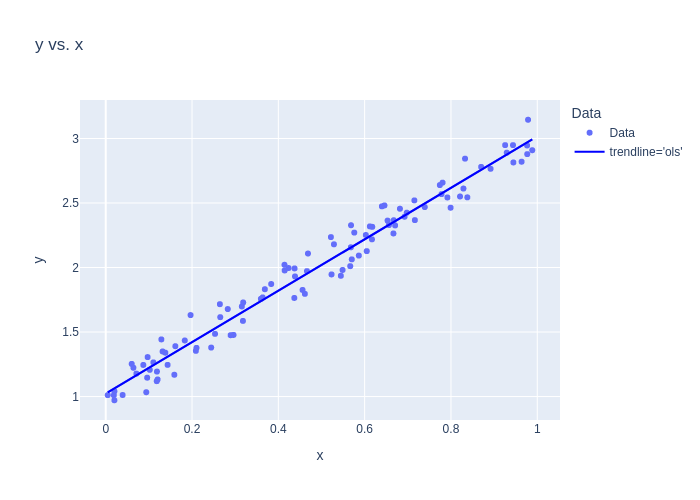

In [9]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import plotly.express as px 

np.random.seed(0)
x = np.random.rand(100)
y = 2 * x + 1 + np.random.randn(100) * 0.1

df = pd.DataFrame({'x': x, 'y': y})

model_data_specification = smf.ols("y ~ x", data=df)
fitted_model = model_data_specification.fit()

summary = fitted_model.summary()
summary_table = fitted_model.summary().tables[1] 
params = fitted_model.params 
params_values = fitted_model.params.values 
rsquared = fitted_model.rsquared 

print(summary)
print(summary_table)
print(params)
print(params_values)
print(rsquared)

df['Data'] = 'Data'

fig = px.scatter(df, x='x', y='y', color='Data', trendline='ols', title='y vs. x')

fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")

Question 3:

This line from question 1 represents the exact relationship we assume exists between x and y, without any influence from random variations or errors. On the other hand, code from question 2 is about finding the best estimate of the relationship between x and y based on actual data. Here, we don’t know the true relationship, so we’re using a linear regression model to fit a line that gets as close as possible to the observed data points. This line won’t be identical because the data includes random noise that slightly throws off the line’s slope and intercept.

The link of ChatGPT for question 3: https://chatgpt.com/share/672d8a93-eea8-8000-9414-d894b76ed222

Question 4:

The fitted model line is based on estimated parameters from actual data, so it’s an approximation rather than the exact theoretical line. fitted_model.params gives us the values for 𝛽̂0 and 𝛽̂1, while fitted_model.fittedvalues uses these parameters to compute the estimated 𝑦̂𝑖 for each 𝑥𝑖 in the dataset.

Question 5:

The line chosen for the fitted model using the "Ordinary Least Squares" method is the one that minimizes the sum of the squared differences between the observed y-values and the predicted y-values. In the plot, you can see the vertical red dashed lines representing the residuals. The fitted line is the one that minimizes the total area of these squared distances between the data points and the predicted line. This method ensures that the model gives the best fit to the data by minimizing the overall error.

Question 6:

A:This expression calculates the correlation coefficient between the actual data points y and the predictor variable x. The correlation coefficient measures the strength and direction of the linear relationship between x and y.
B: This expression calculates the correlation coefficient between the actual observed values y and the fitted values 𝑦̂𝑖.
C: This is the formula for 𝑅2, which directly measures the proportion of variation in y explained by the fitted model. 

Why the final expression can be interpreted as "the proportion of variation in (outcome) y explained by the model (fitted_model.fittedvalues)" :

R2 quantifies the proportion of the total variation in y that can be explained by the model, thus providing a clear measure of how well the fitted model accounts for the variability in the outcome variable y.

Why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model :

The R2 value, calculated using the formula above, directly tells us the proportion of the total variability in 
y that is accounted for by the model's predictions 𝑦̂𝑖. Therefore, R2 can be interpreted as a measure of the accuracy of the model because it shows how well the model fits the data and how much of the data’s variability it can explain.

Question 7:

The relationship between the variables may be non-linear, violating the linearity assumption of the Simple Linear Regression model. And the residuals may exhibit patterns that suggest issues with independence.

Question 8:

The null hypothesis: H0 : 𝛽1 = 0, where 𝛽1 is the slope of the regression line. This H0 means there is no linear relationship between waiting time and eruption duration.

Interpretation of subsequent beliefs regarding the Old Faithful Geyser dataset:
If the p-value is small: We reject the null hypothesis and conclude that there is a statistically significant linear relationship between the waiting time between eruptions and the duration of the eruption. In practical terms, this means that the waiting time does indeed appear to influence the eruption duration, with longer waiting times likely leading to longer eruptions.
If the p-value is large: We fail to reject the null hypothesis, implying that there is no strong evidence of a linear relationship between waiting time and eruption duration in the data. In this case, we would be less confident in asserting that changes in waiting time have a significant effect on the eruption duration.

Question 9:

Evidence Against the Null Hypothesis: The p-value of 0.238 is relatively large, meaning that there is no significant evidence against the null hypothesis. In other words, we do not have sufficient statistical evidence to conclude that there is a linear relationship between waiting time and duration for wait times less than 62 minutes.

Thus, in this restricted dataset (short wait times), the relationship between waiting time and eruption duration does not appear to be as strong or significant as it might be in the full dataset.

Question 10:

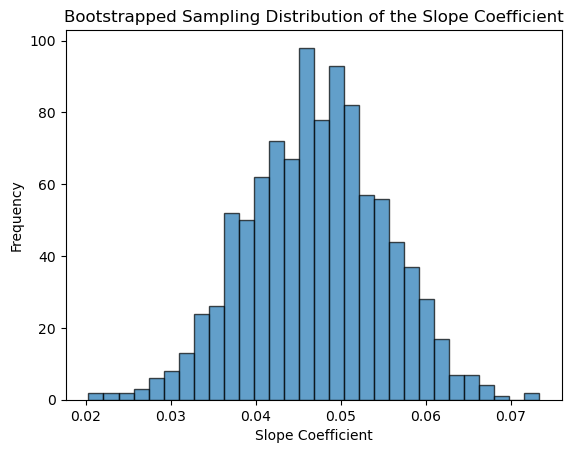

95% Bootstrapped Confidence Interval: (0.03111571935181281, 0.06215437675559059)


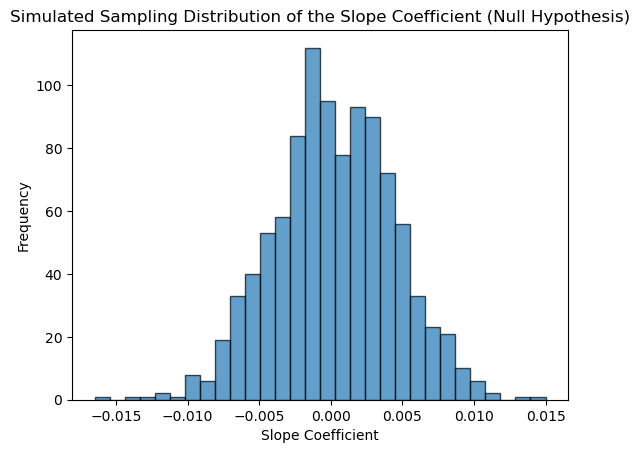

Simulated p-value: 0.0
The observed slope coefficient 0.04675813725483139 is within the 95% bootstrapped confidence interval.


/tmp/ipykernel_70/2385019712.py:49: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [14]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

old_faithful = sns.load_dataset('geyser')

long_wait_limit = 63
long_wait = old_faithful.waiting > long_wait_limit

n_bootstraps = 1000
bootstrapped_slope_coefficients = []

for _ in range(n_bootstraps):
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(model.params['waiting'])

bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

plt.hist(bootstrapped_slope_coefficients, bins=30, edgecolor='black', alpha=0.7)
plt.title("Bootstrapped Sampling Distribution of the Slope Coefficient")
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.show()

ci_lower, ci_upper = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print(f"95% Bootstrapped Confidence Interval: ({ci_lower}, {ci_upper})")

n_simulations = 1000
simulated_slope_coefficients = []

for _ in range(n_simulations):
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(model.params['waiting'])

simulated_slope_coefficients = np.array(simulated_slope_coefficients)

plt.hist(simulated_slope_coefficients, bins=30, edgecolor='black', alpha=0.7)
plt.title("Simulated Sampling Distribution of the Slope Coefficient (Null Hypothesis)")
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.show()

observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params[1]
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print(f"Simulated p-value: {p_value}")

if ci_lower <= observed_slope <= ci_upper:
    print(f"The observed slope coefficient {observed_slope} is within the 95% bootstrapped confidence interval.")
else:
    print(f"The observed slope coefficient {observed_slope} is NOT within the 95% bootstrapped confidence interval.")

Question 11:

The "big picture" differences:
Previous Model Specifications were trying to predict how much the duration would change for every unit change in waiting time. Current Model Specification involves using an indicator variable (kind) to divide the data into two categories: "short" and "long" wait times. This is specified as smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful), where the variable kind is the categorical variable and C(kind, Treatment(reference="short")) tells the model to use "short" wait times as the reference category.

Evidence Against the Null Hypothesis: Since the p-value for the contrast coefficient is significantly smaller than 0.05 (in fact, it’s close to 0), there is strong evidence against the null hypothesis of "no difference between the groups." We conclude that there is a significant difference in the average eruption duration between "short" and "long" wait times.

Question 12:

Model 1 might show the best normality, as this dataset might contain sufficient variation that error terms are more likely to follow a normal distribution. In Model 2 and Model 3, the reduced sample size and more homogenous nature of the data might lead to residuals that are less representative of a normal distribution. Model 4 might lead to residuals that don't follow normality due to the inherent division of the data into "short" and "long" categories, which can create separate clusters of residuals.

Question 13:

Explaination of how the sampling approaches work for the two simulations:

Permutation Testing method tests the null hypothesis of no difference between groups by assuming that any observed difference is due to random chance. It achieves this by randomizing group labels and calculating the mean difference for each shuffle. Bootstrap Confidence Interval estimates the variability of the mean difference by resampling each group independently with replacement.

Question 14:

Yes.